In [14]:
import numpy as np
import emcee
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import random
import scipy.optimize as op
import corner
plt.style.use('classic')

In [15]:
a = 3
b = 2
n = 15
xor = np.linspace(0,2,15)
yor = a*xor + b

In [16]:
def line(x, m, b):
    return(m*x + b)

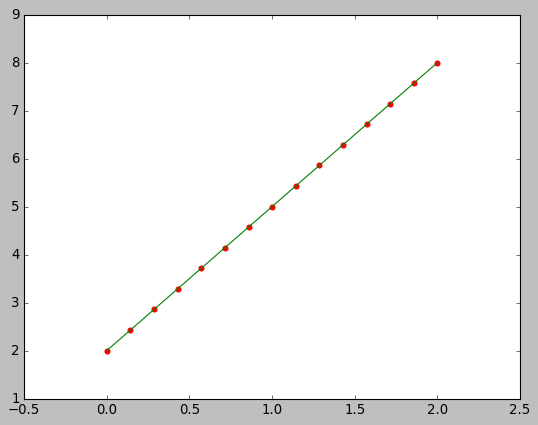

In [17]:
# Graficamos un conjuntp de datos
plt.plot(xor,line(xor,3,2), color='green')
plt.scatter(xor, yor, color='red')

In [18]:
sigma = 0.2
error = np.random.uniform(low=-sigma, high=sigma, size=15)

In [19]:
data = yor + error

<function matplotlib.pyplot.show(*args, **kw)>

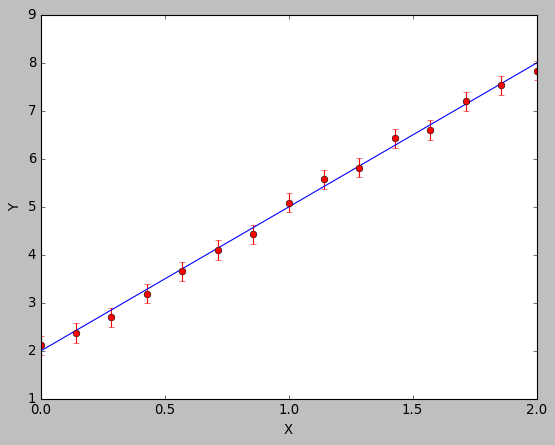

In [20]:
fig, ax = plt.subplots()
ax.errorbar(xor, data, yerr=sigma,fmt='o', c='red')
plt.plot(xor, yor, c='blue', label='ORIGINAL')
plt.xlabel('X')
plt.ylabel('Y')
plt.show

In [21]:
# Se define la funcion quemar para el burning de datos. Se ingresa el porcentaje a quemar
def quemar(x, porcentaje):
    p = porcentaje/100
    x2 = x[int(len(x)*p):]
    return x2

def quemar2(x, y, porcentaje):
    p = porcentaje/100
    x2 = x[int(len(x)*p):]
    y2 = y[int(len(y)*p):]
    return x2,y2

# Se define una funcion para determinar la media de los datos quemados

def quemaymedia(x, porcentaje):
    p = porcentaje/100
    x2 = np.mean(x[int(len(x)*p):])
    return x2


In [22]:
def lnlh(theta):
    modelo=line(xor, theta[0],theta[1])
    diferencia = data - modelo
    u=0
    u = np.dot(diferencia, 0.2)
    u = np.dot(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u

def lnlh2(theta):
    modelo=line(xor, theta[0],theta[1])
    diferencia = data - modelo
    u=0
    u = np.dot(diferencia, 0.2)
    u = np.dot(u,diferencia.T)
    u = -0.5 * np.sum(u)
    return u

def Markov(theta1, thetap):
    p1 = lnlh(theta1)
    pp = lnlh(thetap)
    if(pp>p1):
        return thetap
    else:
        w = np.random.rand()
        if(pp-p1>np.log(w)):
            return thetap
        else:
            return theta1
    return

In [47]:
Nmuestras = 100000
sigma1 = 0.1
sigma2 = 0.1

Ncadenas = 8
thetainicio = [5,0.3]
cadenas = []

for j in range(Ncadenas):
    thetainicio = np.array([np.random.normal(np.random.uniform(5, .100), sigma1), np.random.normal(thetainicio[1], sigma2)])
    for i in range(Nmuestras):
        if i==0:
            cadena = thetainicio
        else:
            thetat = np.array([np.random.normal(thetainicio[0], sigma1), np.random.normal(thetainicio[1], sigma2)])
            thetanuevo = Markov(thetainicio, thetat)
            cadena = np.vstack((cadena, thetanuevo))
            thetainicio = thetanuevo
    if j==0:
        cadenas = cadena
    else:
        cadenas = np.vstack((cadenas, cadena))

In [48]:
x1 = cadenas[0:Nmuestras,0]
y1 = cadenas[0:Nmuestras,1]
x2 = cadenas[Nmuestras+1:Nmuestras*2,0]
y2 = cadenas[Nmuestras+1:Nmuestras*2,1]
x3 = cadenas[2*Nmuestras+1:Nmuestras*3,0]
y3 = cadenas[2*Nmuestras+1:Nmuestras*3,1]
x4 = cadenas[3*Nmuestras+1:Nmuestras*4,0]
y4 = cadenas[3*Nmuestras+1:Nmuestras*4,1]
x5 = cadenas[4*Nmuestras+1:Nmuestras*5,0]
y5 = cadenas[4*Nmuestras+1:Nmuestras*5,1]
x6 = cadenas[5*Nmuestras+1:Nmuestras*6,0]
y6 = cadenas[5*Nmuestras+1:Nmuestras*6,1]
x7 = cadenas[6*Nmuestras+1:Nmuestras*7,0]
y7 = cadenas[6*Nmuestras+1:Nmuestras*7,1]
x8 = cadenas[7*Nmuestras+1:Nmuestras*8,0]
y8 = cadenas[7*Nmuestras+1:Nmuestras*8,1]

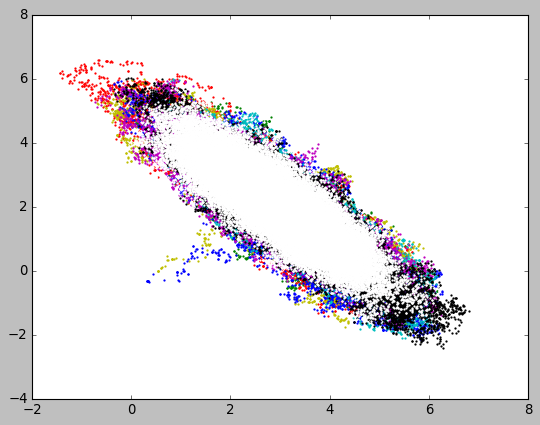

In [49]:
plt.scatter(x1, y1, color = 'g',s=1)
plt.scatter(x2, y2, color = 'r',s=1)
plt.scatter(x3, y3, color = 'y',s=1)
plt.scatter(x4, y4, color = 'b',s=1)
plt.scatter(x5, y5, color = 'c',s=1)
plt.scatter(x6, y6, color = 'm',s=1)
plt.scatter(x7, y7, color = 'k',s=1)
plt.scatter(x8, y8, color = 'w',s=1)

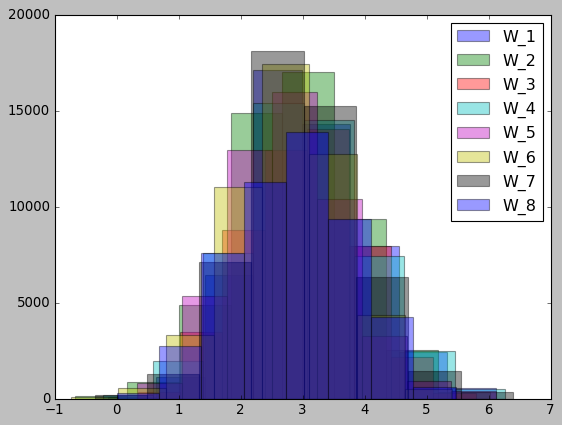

In [50]:
nb = 8
burning = 50 # porcentaje a quemar

plt.hist(quemar(x1, burning), alpha = 0.4, label = 'W_1', bins=nb)
plt.hist(quemar(x2, burning), alpha = 0.4, label = 'W_2', bins=nb)
plt.hist(quemar(x3, burning), alpha = 0.4, label = 'W_3', bins=nb)
plt.hist(quemar(x4, burning), alpha = 0.4, label = 'W_4', bins=nb)
plt.hist(quemar(x5, burning), alpha = 0.4, label = 'W_5', bins=nb)
plt.hist(quemar(x6, burning), alpha = 0.4, label = 'W_6', bins=nb)
plt.hist(quemar(x7, burning), alpha = 0.4, label = 'W_7', bins=nb)
plt.hist(quemar(x8, burning), alpha = 0.4, label = 'W_8', bins=nb)

plt.legend()

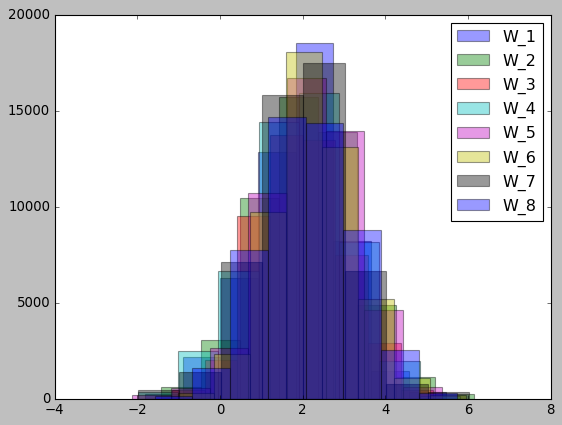

In [51]:
nb = 8
burning = 50 # porcentaje a quemar

plt.hist(quemar(y1, burning), alpha = 0.4, label = 'W_1', bins=nb)
plt.hist(quemar(y2, burning), alpha = 0.4, label = 'W_2', bins=nb)
plt.hist(quemar(y3, burning), alpha = 0.4, label = 'W_3', bins=nb)
plt.hist(quemar(y4, burning), alpha = 0.4, label = 'W_4', bins=nb)
plt.hist(quemar(y5, burning), alpha = 0.4, label = 'W_5', bins=nb)
plt.hist(quemar(y6, burning), alpha = 0.4, label = 'W_6', bins=nb)
plt.hist(quemar(y7, burning), alpha = 0.4, label = 'W_7', bins=nb)
plt.hist(quemar(y8, burning), alpha = 0.4, label = 'W_8', bins=nb)

plt.legend()

### Valores medios para camiandor con los datos quemados

#### Valores para 'a'

In [52]:
bur = 60 # Porcentaje de datos a quemar

In [53]:
a1=quemaymedia(x1, bur)
a1

3.1295080133740893

In [54]:
a2=quemaymedia(x2, bur)
a2

2.8579389370586714

In [55]:
a3=quemaymedia(x3, bur)
a3

2.972222908488477

In [56]:
a4=quemaymedia(x4, bur)
a4

3.0381209571016012

In [57]:
a5=quemaymedia(x5, bur)
a5

2.815627967049591

In [58]:
a6=quemaymedia(x6, bur)
a6

2.785612741923612

In [59]:
a7=quemaymedia(x7, bur)
a7

2.984672328097357

In [60]:
a8=quemaymedia(x8, bur)
a8

2.971192714958632

Media entre los 8 caminadores

In [61]:
np.mean([a1, a2, a3, a4, a5, a6, a7, a8])

2.9443620710065037

#### Valores para 'b'

In [62]:
b1=quemaymedia(y1, bur)
b1

1.8210896514029737

In [63]:
b2=quemaymedia(y2, bur)
b2

2.114794205593409

In [64]:
b3=quemaymedia(y3, bur)
b3

2.0187633564881575

In [65]:
b4=quemaymedia(y4, bur)
b4

1.9425043281680838

In [66]:
b5=quemaymedia(y5, bur)
b5

2.2015381469655324

In [67]:
b6=quemaymedia(y6, bur)
b6

2.242014301360293

In [68]:
b7=quemaymedia(y7, bur)
b7

2.008364463094079

In [69]:
b8=quemaymedia(y8, bur)
b8

2.0178546318749357

Media entre los 8 caminadores

In [70]:
np.mean([b1, b2, b3, b4, b5, b6, b7, b8])

2.0458653856184332